## Assignment 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # For interactive 3D plotting

# Trigger interactive windows for plots
%matplotlib widget
plt.style.use("nord")
plt.rcParams['axes.unicode_minus'] = False # For displaying "-" sign normally

ModuleNotFoundError: No module named 'ipympl'

#### Question 1 - Linear Congruential Generator

(a) Implement LCG

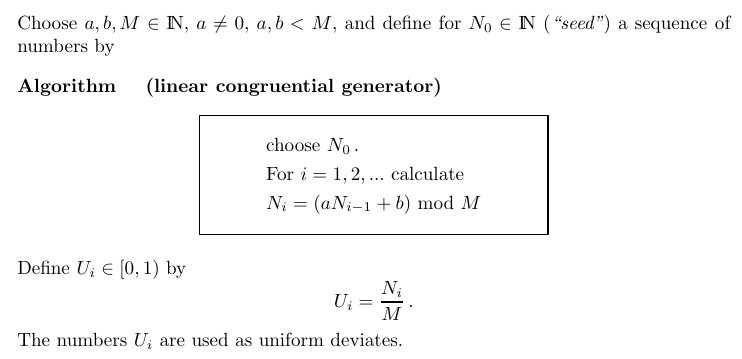

(b) Plotting results, including:

-   Histogram of generated random numbers
-   2D Lattice Structure Plot
-   3D Lattice Structure Plot

In [ ]:
def lcg(n = 1, seed = 12345, a = 1597, b = 51749, M = 244944):
    U = [0] * n
    U[0] = seed
    for i in range(1, n):
        U[i] = (a * U[i - 1]) % M
    for i in range(n):
        U[i] /= M
    return U

In [ ]:
U = np.array(lcg(1000))

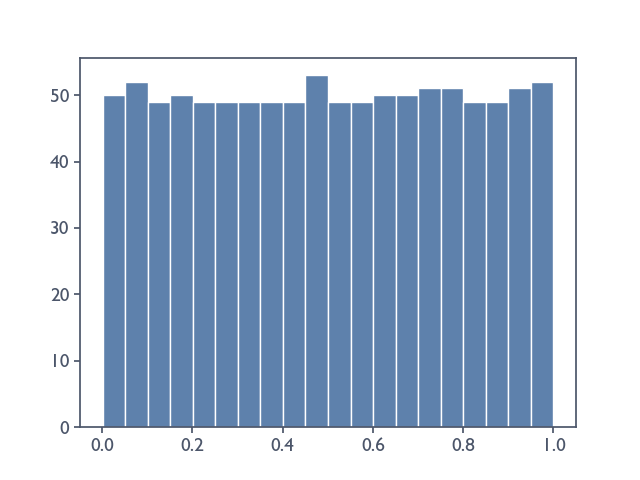

In [ ]:
plt.figure("Histogram of LCG", clear = True)
plt.hist(U, bins = 20, edgecolor = "white")
plt.show()

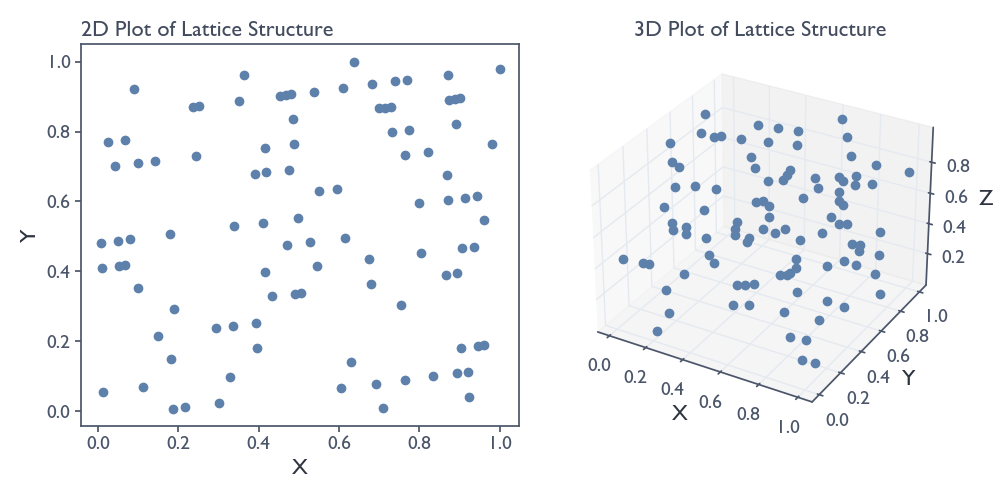

In [ ]:
X = U[0:100]
Y = U[1:101]
Z = U[2:102]

fig, ax = plt.subplots(1, 2, figsize = (10, 5), clear = True)
fig.set_label("Lattice Structures")

# Remove default axes
ax[0].axis('off')
ax[1].axis('off')

# 2D Plot of lattice structure
ax[0] = fig.add_subplot(121) # 211 means 2 rows, 1 column, 1st subplot
ax[0].plot(X, Y, 'o')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('2D Plot of Lattice Structure')

# 3D Plot of lattice structure
ax[1] = fig.add_subplot(122, projection = '3d')
ax[1].plot(X, Y, Z, 'o')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_zlabel('Z')
ax[1].set_title('3D Plot of Lattice Structure')

plt.tight_layout()
plt.show()



#### Question 2 - Transformation Method / Transformation of R.V.

If U is a uniform random number on $[-\frac{\pi}{2},\frac{\pi}{2}]$, what is the distribution of $X = \cos U$?

(a) Deterministic solution:

By transformation of random variables, we may obtain:

$$
f_X(x) = f_U(\cos^{-1}x)\left|\frac{d}{dx}\cos^{-1}x\right| = \frac{2}{\pi\sqrt{1-x^2}}\mathbb{1}_{[0,1]}(x)
$$

(b) Sample numerically:

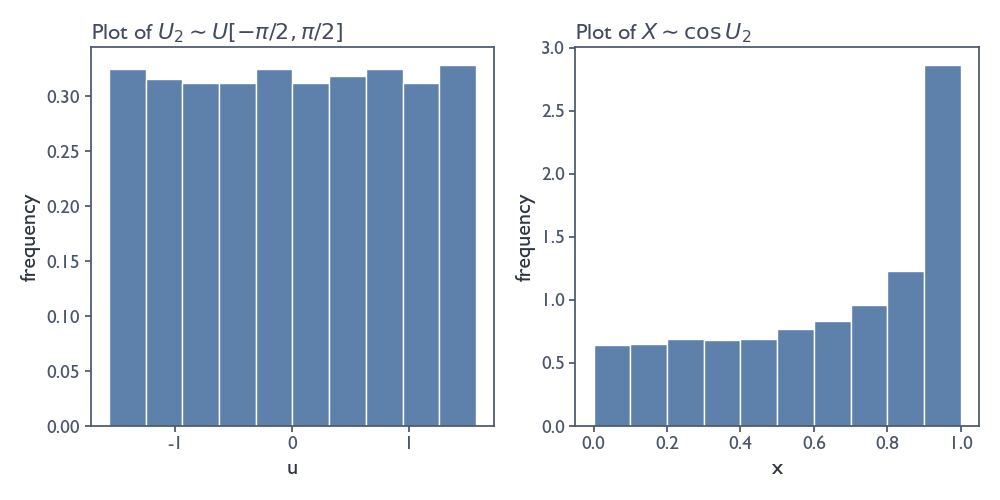

In [ ]:
# Adjust LCG simulated standard uniform r.v. to U ~ [-pi/2, pi/2]
U2 = U * np.pi - np.pi / 2
X = np.cos(U2)

fig, ax = plt.subplots(1, 2, figsize = (10, 5), clear = True)
fig.set_label("Histograms of Trnasformed Random Numbers")

ax[0].axis('off')
ax[1].axis('off')

ax[0] = fig.add_subplot(121)
ax[0].set_title(r"Plot of $U_2\sim U[-\pi/2,\pi/2]$")
ax[0].hist(U2, density = True, edgecolor = "white")
ax[0].set_xlabel("u")
ax[0].set_ylabel("frequency")

ax[1] = fig.add_subplot(122)
ax[1].set_title(r"Plot of $X\sim \cos U_2$")
ax[1].hist(X, density = True, edgecolor = "white")
ax[1].set_xlabel("x")
ax[1].set_ylabel("frequency")

plt.tight_layout()
plt.show()

#### Question 3 - Fibonacci random number generator (Lagged Fibonacci Generator)

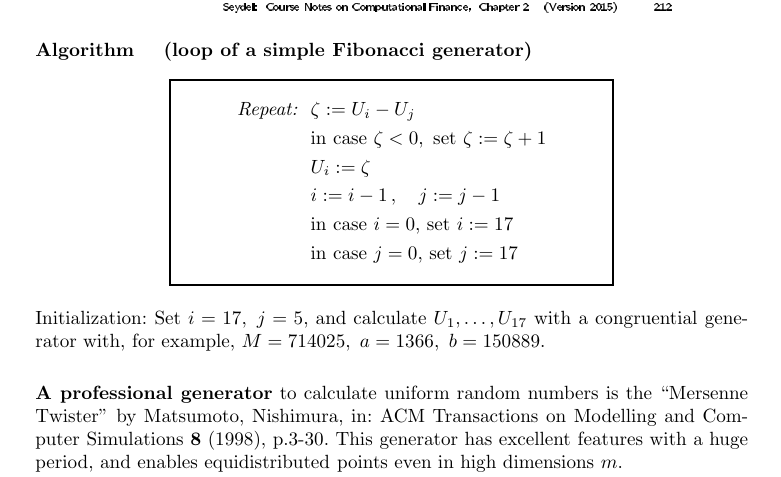

```matlab
U = zeros(1,nu);
U(1) = seed;
for i = 2:nu
    U(i) = mod(a*U(i-1)+b,M);  
end

% Fibonacci generator
for i = nu+1:nsample
    U(i) = mod(U(i-nu)-U(i-mu),M);  
end
```

In [ ]:
def lfg(n = 1, mu = 5, nu = 17, seed = 12345, a = 1366, b = 150889, M = 714025): # mu < nu, useful when n > nu

    # Define usual LCG
    U = [0] * max(n, nu)
    U[0] = seed

    for i in range(1, nu):
        U[i] = (a * U[i - 1] + b) % M
    
    # Introcduce Fibbonacci generator
    for i in range(nu, n):
        U[i] = (U[i - nu] - U[i - mu]) % M
    
    # Normalised to [0,1]
    for i in range(n):
        U[i] /= M
    
    return U

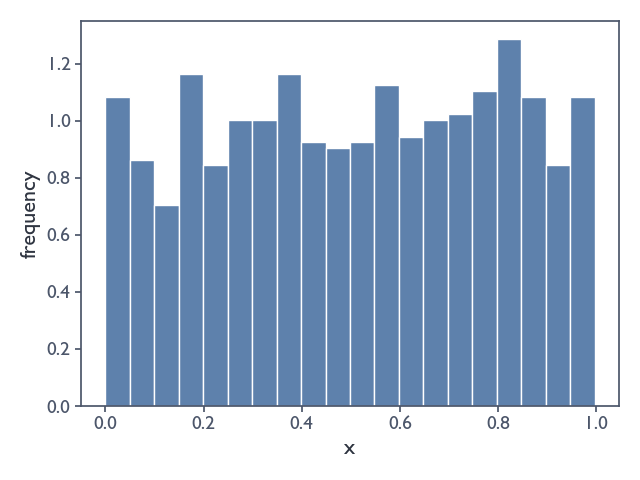

In [ ]:
U_lfg = lfg(1000)

plt.figure("LFG Standard Uniform Samples", clear = True)
plt.hist(U_lfg, density = True, bins = 20, edgecolor = "white")
plt.xlabel("x")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

#### Question 4 - Obtain Normal Random Variables using Rejection Method

0.761071
1.315489246958914
1.3154892469583304


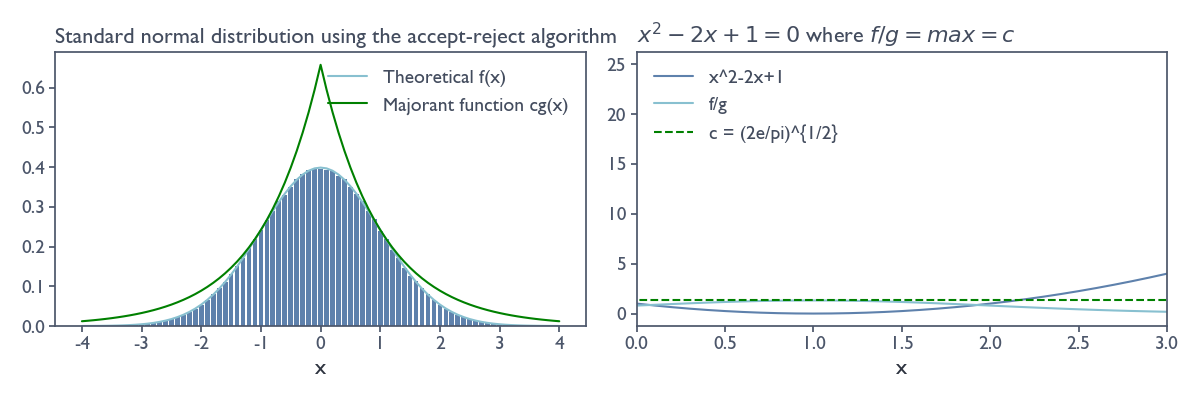

In [ ]:
n = 10**6
c = np.sqrt(2*np.exp(1)/np.pi)
deltax = 0.1
xmax = 4
x = np.arange(-xmax, xmax+deltax, deltax)

U1 = np.random.rand(n)
L = np.log(2*U1)*(U1<0.5)-np.log(2*(1-U1))*(U1>=0.5)

g = 0.5*np.exp(-np.abs(L))
f = 1/np.sqrt(2*np.pi)*np.exp(-L**2/2)
U2 = np.random.rand(n)
N = L[U2*c*g<=f]
print(len(N)/n) # acceptance ratio
print(c) # analytical value
print(np.max(f/g)) # numerical check

fig, ax = plt.subplots(1, 2, figsize=(12, 4), clear = True)

x2 = np.concatenate((x-deltax/2, [x[-1]+deltax/2]))

fx = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
gx = 0.5*np.exp(-np.abs(x))

ax[0].hist(N, bins = x2, density=True, rwidth=0.8)
ax[0].plot(x, fx, x, c*gx, 'g')
ax[0].set_xlabel('x')
ax[0].legend(['Theoretical f(x)', 'Majorant function cg(x)'])
ax[0].set_title('Standard normal distribution using the accept-reject algorithm')

ax[1].plot(x, x**2-2*x+1, x, fx/gx, x, c*np.ones_like(x), '--g')
ax[1].set_xlim([0, 3])
ax[1].set_xlabel('x')
ax[1].legend(['x^2-2x+1', 'f/g', 'c = (2e/pi)^{1/2}'], loc='upper left')
ax[1].set_title(r'$x^2-2x+1 = 0$ where $f/g = max = c$')

plt.tight_layout()
plt.show()